In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv


In [2]:
df=pd.read_csv('/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df.shape

(4340, 8)

In [5]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.duplicated().sum()

763

In [9]:
df.drop_duplicates()
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [10]:
df.shape

(4340, 8)

In [11]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


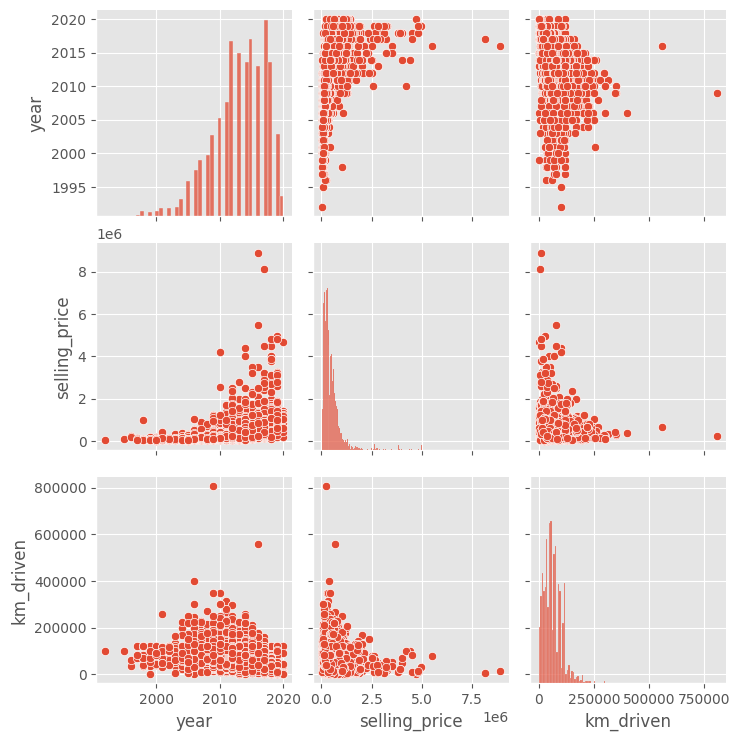

In [12]:
sns.pairplot(df)

In [13]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [14]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()   # in Jupyter


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 47.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df['name'].nunique()

1491

In [16]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [17]:
selling_cars=df['name'].value_counts().idxmax
selling_cars_counts=df['name'].value_counts().max

In [18]:
selling_cars

<bound method Series.idxmax of name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64>

In [19]:
selling_cars_counts

<bound method Series.max of name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64>

In [20]:
yearly_sales=df['year'].value_counts().sort_index()
yearly_sales

year
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
Name: count, dtype: int64

In [21]:
sold_year=yearly_sales.idxmax
sold_year

<bound method Series.idxmax of year
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
Name: count, dtype: int64>

In [22]:
sold_year_count=yearly_sales.max
sold_year_count

<bound method Series.max of year
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
Name: count, dtype: int64>

In [23]:
numerical_summary=df[['selling_price','km_driven','year']].describe()
numerical_summary

,selling_price,km_driven,year
count,4.340000e+03,4340.000000,4340.000000
mean,5.041273e+05,66215.777419,2013.090783
std,5.785487e+05,46644.102194,4.215344
min,2.000000e+04,1.000000,1992.000000
25%,2.087498e+05,35000.000000,2011.000000
50%,3.500000e+05,60000.000000,2014.000000
75%,6.000000e+05,90000.000000,2016.000000
max,8.900000e+06,806599.000000,2020.000000


In [24]:
df[['fuel','seller_type','transmission','owner']].nunique()

fuel            5
seller_type     3
transmission    2
owner           5
dtype: int64

In [25]:
df[['fuel','seller_type','transmission','owner']].value_counts()

fuel      seller_type       transmission  owner               
Petrol    Individual        Manual        First Owner             892
Diesel    Individual        Manual        First Owner             835
Petrol    Individual        Manual        Second Owner            454
Diesel    Individual        Manual        Second Owner            453
          Dealer            Manual        First Owner             336
Petrol    Dealer            Manual        First Owner             306
Diesel    Individual        Manual        Third Owner             142
Petrol    Individual        Manual        Third Owner             130
Diesel    Dealer            Automatic     First Owner             114
Petrol    Dealer            Automatic     First Owner              80
Diesel    Individual        Automatic     First Owner              73
Petrol    Individual        Automatic     First Owner              67
Diesel    Dealer            Manual        Second Owner             56
Petrol    Trustmark Dealer 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Count'>

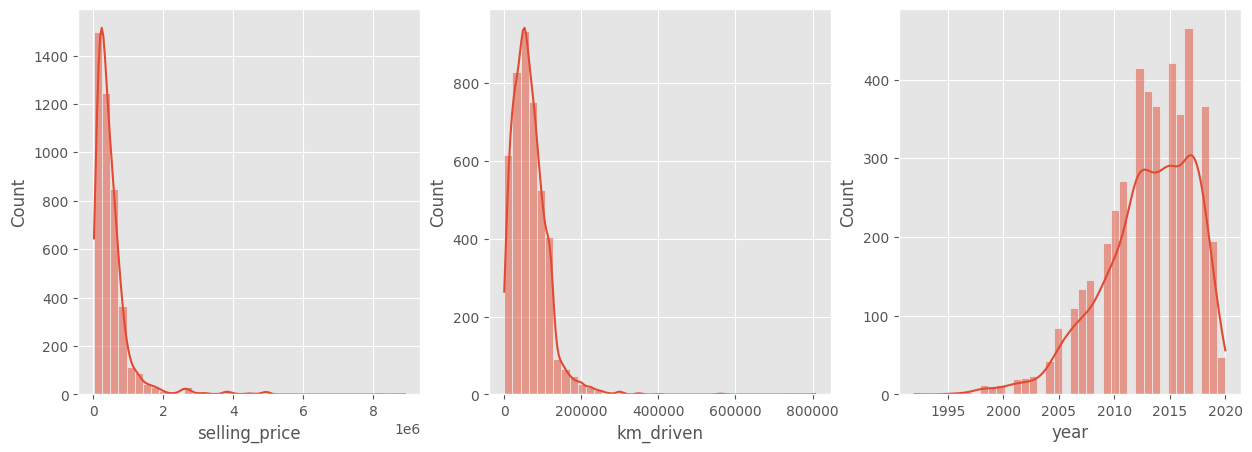

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df['selling_price'],bins=38,kde=True)
plt.subplot(1,3,2)
sns.histplot(df['km_driven'],bins=38,kde=True)
plt.subplot(1,3,3)
sns.histplot(df['year'],bins=38,kde=True)

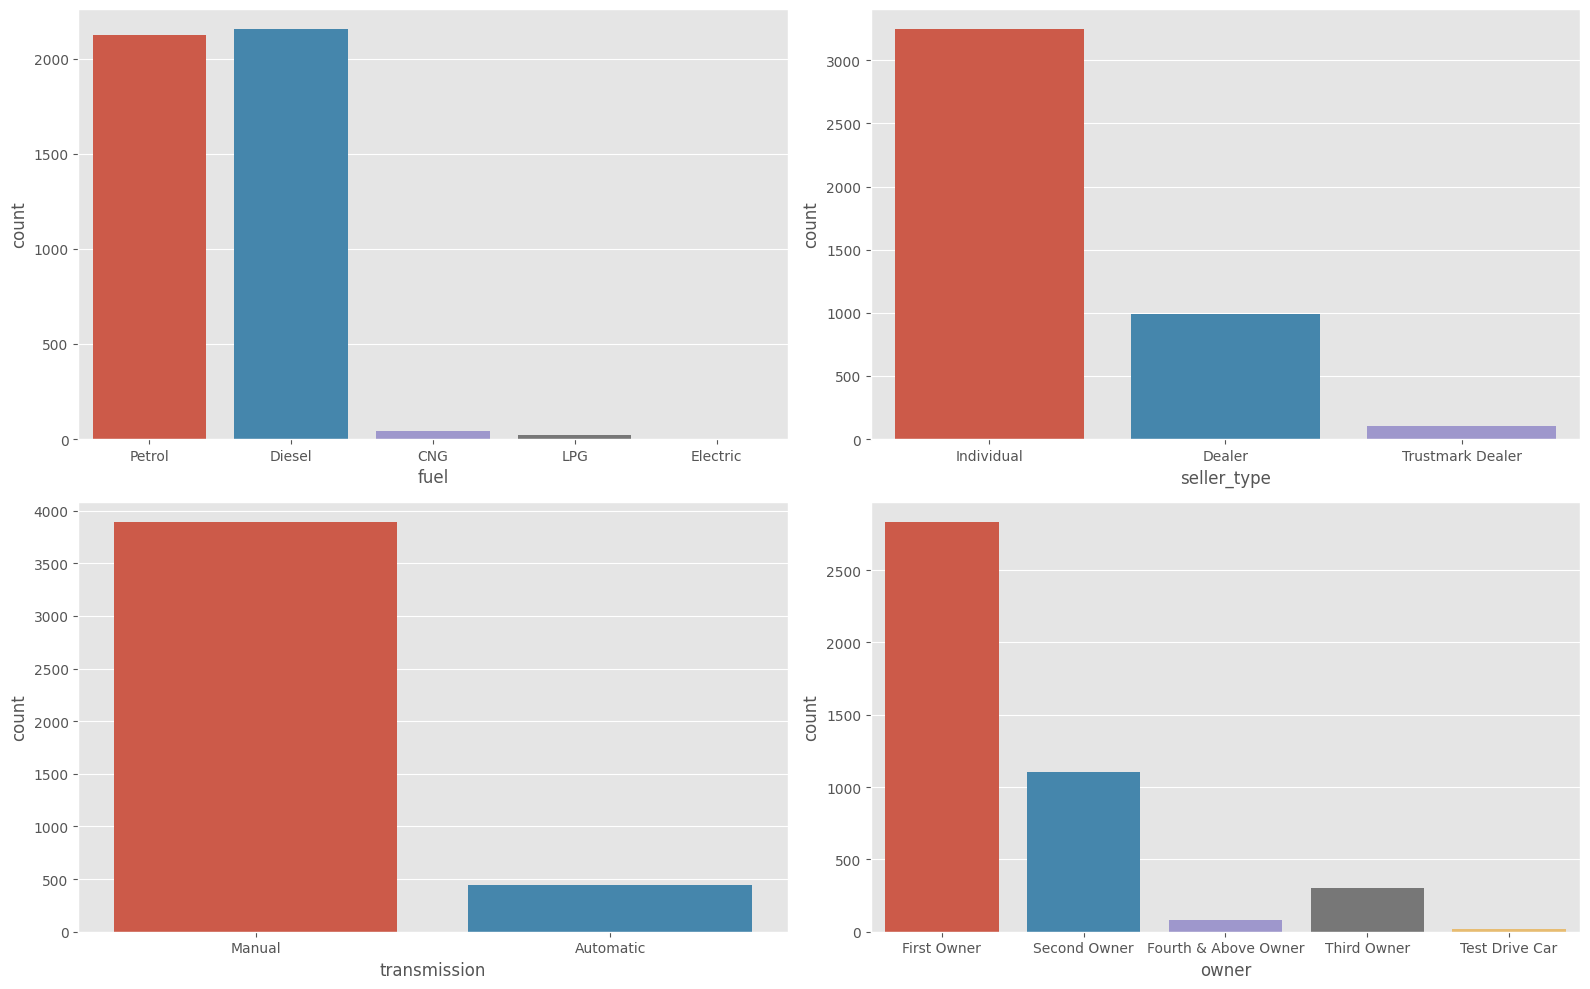

In [27]:
categorical_columns=['fuel','seller_type','transmission','owner']
plt.figure(figsize=(16,10))
for i,col in enumerate(categorical_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,x=col)
plt.tight_layout()

In [28]:
avg_price=df.groupby('fuel')['selling_price'].mean().reset_index()
avg_price

,fuel,selling_price
0,CNG,277174.925000
1,Diesel,669094.252206
2,Electric,310000.000000
3,LPG,167826.043478
4,Petrol,344840.137541


<Axes: xlabel='fuel', ylabel='selling_price'>

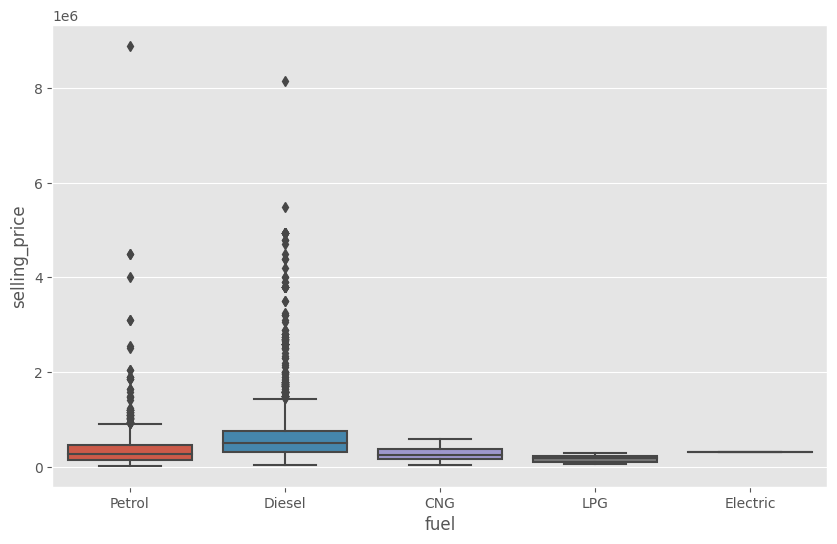

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel',y='selling_price',data=df)

<Axes: xlabel='transmission', ylabel='selling_price'>

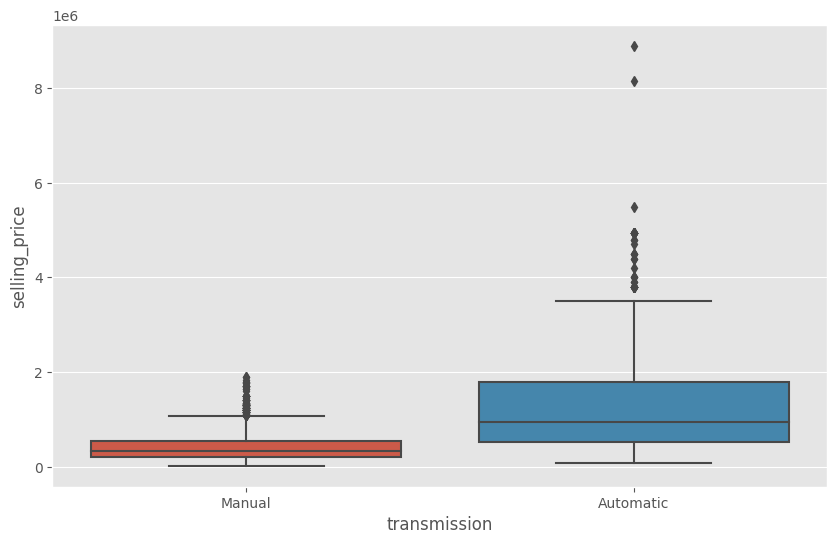

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission',y='selling_price',data=df)

<Axes: xlabel='km_driven', ylabel='selling_price'>

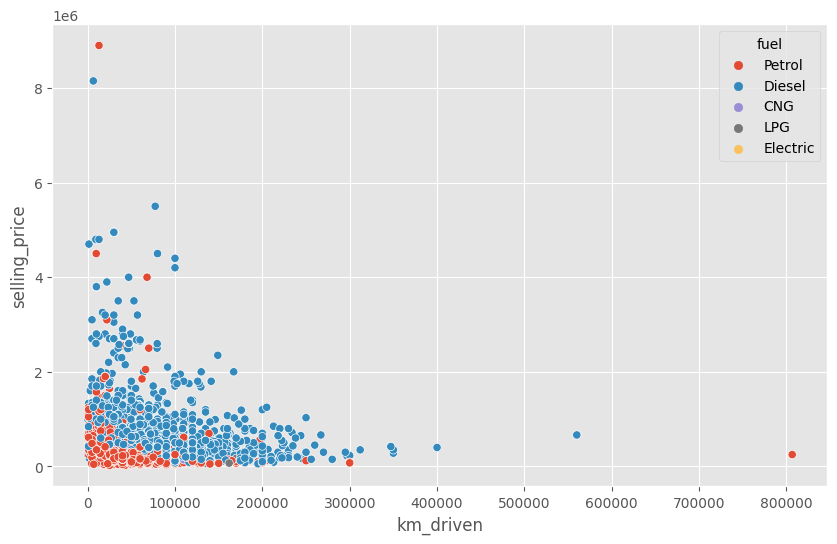

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven',y='selling_price',data=df,hue='fuel')

<Axes: xlabel='seller_type', ylabel='selling_price'>

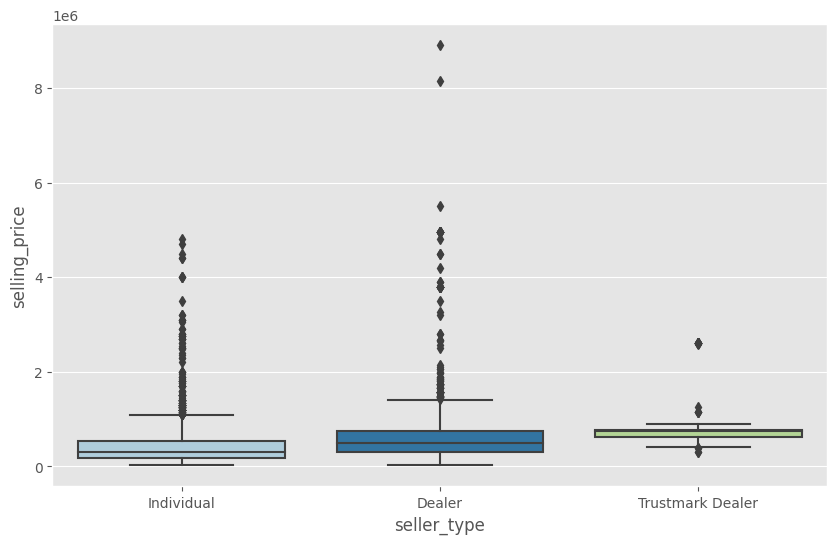

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='seller_type',y='selling_price',data=df,palette='Paired')

In [33]:
sold_by_seller=df.groupby('seller_type')['name'].count().reset_index()
sold_by_seller

,seller_type,name
0,Dealer,994
1,Individual,3244
2,Trustmark Dealer,102


In [34]:
sold_by_seller.columns=['Seller Type','Total Cars Sold']
sold_by_seller

,Seller Type,Total Cars Sold
0,Dealer,994
1,Individual,3244
2,Trustmark Dealer,102


([<matplotlib.patches.Wedge at 0x7e00193b8110>,
 [Text(-1.0997482640072365, -0.023532016765888255, 'Dealer'),
  Text(1.0984878551038948, -0.05765788921946984, 'Individual'),
  Text(-0.7881944609244808, 0.7673001314791803, 'Trustmark Dealer')],
 [Text(-0.5998626894584925, -0.012835645508666319, '22.9%'),
  Text(0.5991751936930335, -0.031449757756074455, '74.7%'),
  Text(-0.4299242514133531, 0.41852734444318923, '2.4%')])

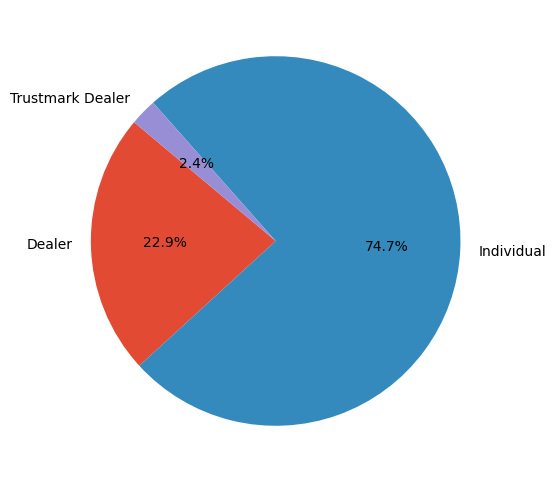

In [35]:
plt.figure(figsize=(6, 6))

plt.pie(sold_by_seller['Total Cars Sold'], labels=sold_by_seller['Seller Type'], autopct='%1.1f%%', startangle=140)

<Axes: xlabel='fuel', ylabel='count'>

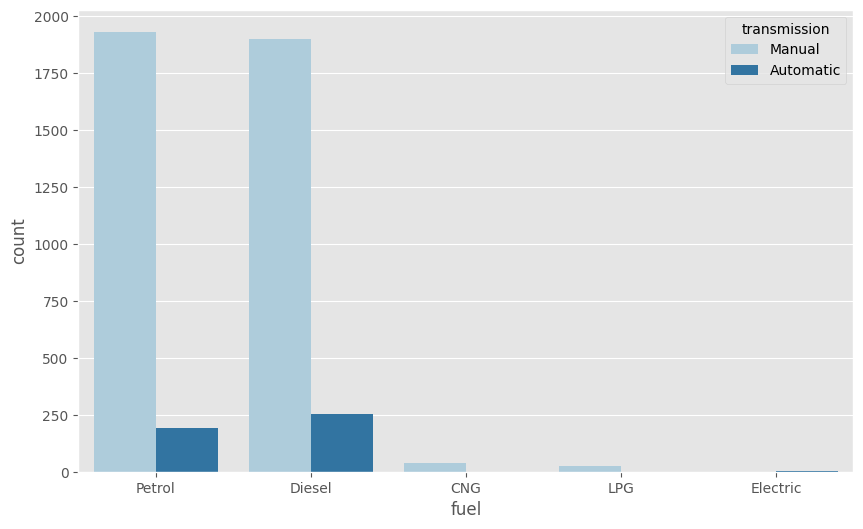

In [36]:
plt.figure(figsize=(10, 6))

sns.countplot(x='fuel', hue='transmission', data=df, palette='Paired')

In [37]:
avg_km_by_year = df.groupby('year')['km_driven'].mean().reset_index().sort_index()
avg_km_by_year

,year,km_driven
0,1992,100000.000000
1,1995,100000.000000
2,1996,47500.000000
3,1997,90000.000000
4,1998,64583.333333
5,1999,67702.000000
6,2000,70936.916667
7,2001,83712.850000
8,2002,85047.619048
9,2003,81671.347826


<Axes: xlabel='year', ylabel='selling_price'>

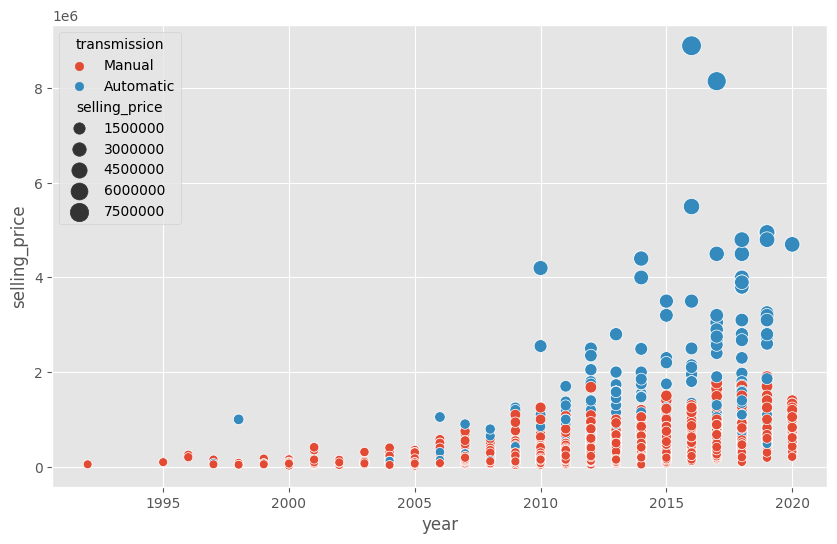

In [38]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='year', y='selling_price', data=df, hue='transmission', size='selling_price', sizes=(40, 200))